In [1]:
# !/usr/bin/python3
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [2]:
label = []
message = []
with open('train.txt', 'r') as f:
    for numLine,line in enumerate(f):
        line = line.replace('\n', '')
        splitLine = line.split(' ')
        label.append(splitLine[0])
        splitLine.__delitem__(0)
        temp = ' '.join(splitLine)
        message.append(temp)

f.close()
# type(splitLine)

In [3]:
message

['Ghe goi dau loai 1 chinh hang giam gia con hang cong ty chinh hang giam gia con thoi gian khuyen mai het ngay luu y',
 'Anh thay em tuoi tho du doi a phet day. Viet ve sau phong van ho hoi day. Se co cam giac than thien',
 'Chuc mung 093 xxx nhan duoc bai hat Vip "Luc moi yeu" tu mot nguoi ban ten H tang. De nghe bai hat va loi nhan duoc ghi am soan: VIP gui 7799',
 'Troi dep thi bao troi dep, u ko dien den muc i dau. Co 1 it nc mat roi. Hoho minh chua bi lanh cam :v',
 'Ranh tao nho chut viec',
 'Nhan dip ra mat tang Quy khach SBC se du doan trung ...',
 'Ban duoc tang Tuyen tap 500 GAME ONLINE chon loc cuc hay',
 'ko phai ninh dam. tu nhien nghi ra de nt ah',
 'Duoc roi dang nao cung phai qua ben do nop don. Haizzzzz sao ma bao luu cung thay tiec qua.suy nghi may hnay roi',
 'May dang o dau the',
 'Xin cam on va chuc mung ban cung 5585 ban khac voi cap 33-88 cua VD hom qua Hom nay VD mua tiep 1 cap cam ket an ca 2, co the an DB',
 'chac ko dau. ong anh dua di thi em moi di duoc. em

In [4]:
len(label)

100

In [5]:
## chuyen doi list den DataFrame
message_Frame = pd.DataFrame({'label': label, 'message': message}) 

In [12]:
print(message_Frame)

   label                                            message  length
0     -1  Ghe goi dau loai 1 chinh hang giam gia con han...     115
1      1  Anh thay em tuoi tho du doi a phet day. Viet v...      99
2     -1  Chuc mung 093 xxx nhan duoc bai hat Vip "Luc m...     141
3      1  Troi dep thi bao troi dep, u ko dien den muc i...     101
4      1                             Ranh tao nho chut viec      22
5     -1  Nhan dip ra mat tang Quy khach SBC se du doan ...      55
6     -1  Ban duoc tang Tuyen tap 500 GAME ONLINE chon l...      56
7      1        ko phai ninh dam. tu nhien nghi ra de nt ah      43
8      1  Duoc roi dang nao cung phai qua ben do nop don...     112
9      1                                 May dang o dau the      18
10    -1  Xin cam on va chuc mung ban cung 5585 ban khac...     131
11     1  chac ko dau. ong anh dua di thi em moi di duoc...      69
12     1  chinh a cung goi la ba gia roi con noi gi nua....      81
13     1  Cau goi dien cho thay chua. Hom nay le

In [13]:
message_Frame['length'] = message_Frame['message'].apply(len)
message_Frame.head()

,label,message,length
0,-1,Ghe goi dau loai 1 chinh hang giam gia con han...,115
1,1,Anh thay em tuoi tho du doi a phet day. Viet v...,99
2,-1,"Chuc mung 093 xxx nhan duoc bai hat Vip ""Luc m...",141
3,1,"Troi dep thi bao troi dep, u ko dien den muc i...",101
4,1,Ranh tao nho chut viec,22


In [14]:
message_Frame.describe()

,length
count,100.000000
mean,88.280000
std,48.070041
min,15.000000
25%,55.000000
50%,82.500000
75%,115.000000
max,270.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ae80b1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ae7ca438>], dtype=object)

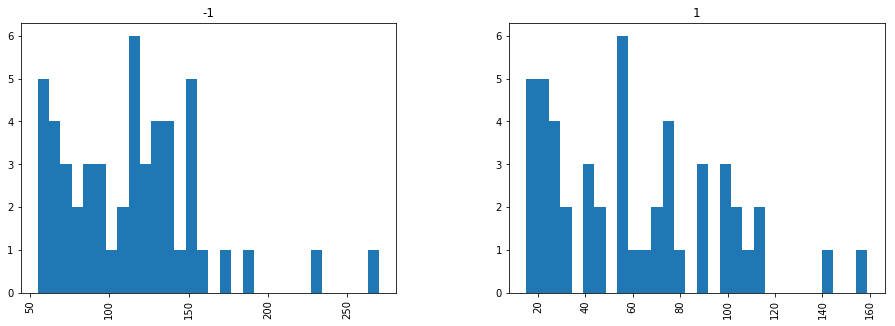

In [15]:
%matplotlib inline

# ve do thi histogram ve 
message_Frame.hist(by='label', column='length', bins=30, figsize=[15, 5])

In [17]:
x = message_Frame.message
y = message_Frame.label

In [18]:
from sklearn.model_selection import train_test_split

# chia tap ngu lieu ra lam 2 phan ti le 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=11)

In [19]:
x_train.shape

(75,)

In [20]:
print(x_train)

96                       U ch? qua d?y l?y t?m 6h k? 10
2     Chuc mung 093 xxx nhan duoc bai hat Vip "Luc m...
11    chac ko dau. ong anh dua di thi em moi di duoc...
28    Re nhat rong bay tu quy du loai, website chuye...
9                                    May dang o dau the
68    So huu vong eo thon gon san chac la muc tieu k...
52    Con oi, u co nen gap lao i noi ro rang het moi...
66    BAN LA NGUOI MAY MAN! HaLinh Tang ban 5 Lan Da...
97    Cty Dinh Thai - Chuyen sx cac loai dien tro do...
42    Troi ret nam trong chan am vai. Dech muon di h...
69    be ngoai thi the thoi. em phai lon hon a 2 tuo...
18                              chuan bi $ hoc lai tiep
85                    Mai di tap the duc thi goi to nhe
26                                 Cam on cau nhieu nhe
99                                  C cung biet so co a
19                             ko sao ca di ngu som di.
65    Mo ban 100.000 ve "Bay khap Viet Nam" gia co 1...
86    BAN LA NGUOI MAY MAN HaLinh Tang ban 5 Lan

In [21]:
x_test.shape

(25,)

In [22]:
type(x_train)

pandas.core.series.Series

In [ ]:
vect = CountVectorizer()
# chuyen doi den vecto
X_train = vect.fit_transform(x_train)
# chuyen doi vecto
X_test = vect.transform(x_test)

In [ ]:
tfidf_x_train = TfidfTransformer().fit_transform(X_train)
tfidf_x_test = TfidfTransformer().fit_transform(X_test)

In [ ]:
print(tfidf_x_train)

In [ ]:
# phan loai theo cac phuong phap
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [ ]:
def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)
    
def predict(clf,X_test):
    return clf.predict(X_test)

In [ ]:
# dinh nghia ten phan loai
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [ ]:
# du doan va tinh do chinh xac
score = []
score_tfidf = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    training(c, tfidf_x_train.toarray(), y_train)
    
    pred = predict(c,X_test.toarray())
    pred_tfidf = predict(c, tfidf_x_test.toarray())
    
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))
    score_tfidf.append((n,[accuracy_score(y_test,pred_tfidf,normalize=True)]))

In [ ]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores'])
# them cot accuracy
score_df['Accuracy (%)']=score_df['scores']*100
print("Use count words:\n")
print(score_df)
score_df_tfidf = pd.DataFrame.from_items(score_tfidf, orient='index', columns=['score_tfidf'])
score_df_tfidf['Accuracy ifidf (%)']=score_df_tfidf['score_tfidf']*100
print("\nUse tfidf:\n")
print(score_df_tfidf)

In [ ]:
spam = ['BAN may mắn khi trúng thưởng']

In [ ]:
vec_spam = vect.transform(spam)

In [ ]:
print(vec_spam)

In [ ]:
for n,c in classifier.items():
    pred = predict(c, vec_spam.toarray())
    print(pred)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
pipeline = Pipeline([('bow', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])

In [ ]:
pipeline.fit(x_train, y_train)

In [ ]:
predictions = pipeline.predict(x_test)

In [ ]:
print(classification_report(predictions, y_test))